## Import libraries

In [1]:
import cProfile
%pylab inline
import numpy as np
%matplotlib agg

Populating the interactive namespace from numpy and matplotlib


# Task 6 Advanced specgram

## Run assistive plot functions

In [2]:
import imageio
from IPython.display import Image

In [3]:
def my_plot(x, y, title, xlabel, ylabel, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.plot(x, y, "g.--")    
    plt.title(title) #, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)

In [4]:
def my_imshow(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    im = plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)
    plt.ylim(0, 10)
    return im

## Generate the signal
* E.g., signal consits of wave packets of three harmonic signals

In [5]:
def form_signal(n_timestamps = 4096):
    t=np.linspace(-20*2*pi, 20*2*pi, n_timestamps)
    y=np.sin(t)*exp(-t**2/2/20**2)               #generate first  wave packets of harmonic signal
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)  #add      second wave packets of harmonic signal
    y=y+np.sin(4*t)*exp(-(t-5*2*pi)**2/2/20**2)  
    y=y+np.sin(5*t)*exp(-(t-10*2*pi)**2/2/10**2) #add      third  wave packets of harmonic signal
    return t, y

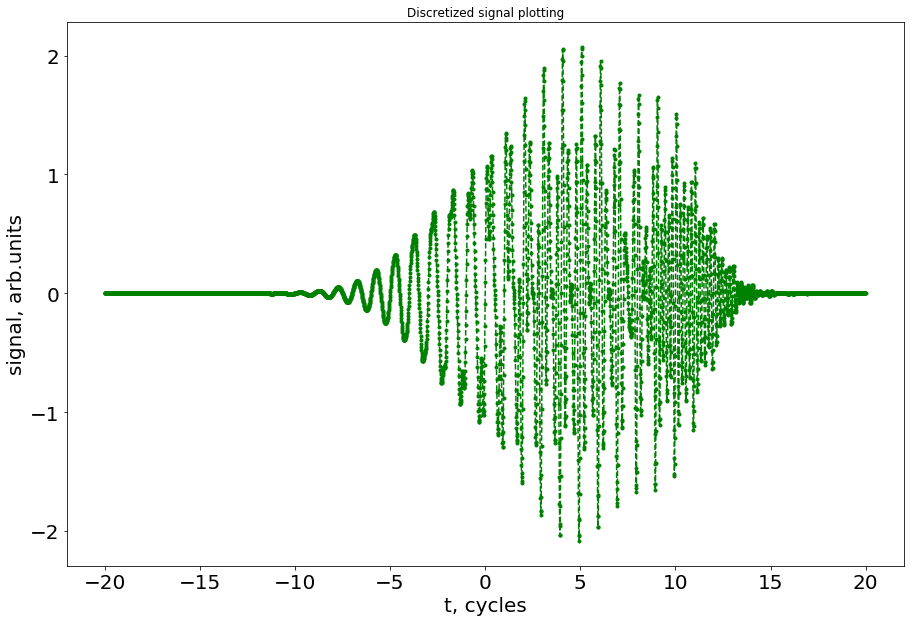

In [6]:
t, y = form_signal()
my_plot(t / 2 / pi, y, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

## Amplitude-Frequency Power (AFP) characteristic

* <b> AFP </b> provides us with information about <strong>amplitudes </strong> of separated <strong> harmonic </strong> signals (spectral analysis) 
* <b> AFP </b> does <strong>not </strong> give information about the frequency and amplitude depence <strong> on time </strong>.

### Explain, why the "hats" of signal and AFP may be sharp

In [16]:
from multiprocessing import Pool

In [ ]:
def f(x):
    return np.sin(x)

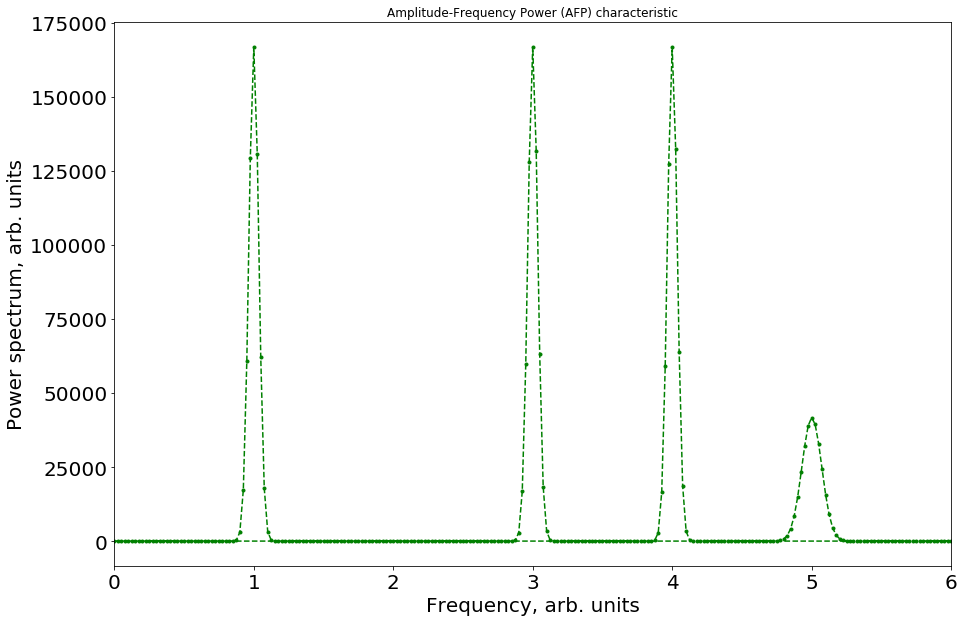

In [7]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 6)
plt.show()

**Explanations.** On Amplitude-Frequency Power (AFP) characteristic we can clearly see three harmonics of the signal with angular frequency w = 1; 3; 4; 5.
It is sharp "hats" that we can see.

## Applicate short-time Fourier transform (STFT)
* <b> STFT </b> provides us with information about the frequency and amplitude depence <strong> on time </strong> (specgram).
* vary $\operatorname{kappa} = \overline{0.1, \,10}$, write down results into gif (add in title of picture values of kappa), and explain, why specgram is different.

In [8]:
def window_function(t, window_position, window_width):
    return exp(- (t - window_position) ** 2 / 2 / window_width ** 2)


def get_specgram(window_width, nwindowsteps = 1000):
    t_window_positions=linspace(-20 * 2 * pi, 20 * 2 * pi, nwindowsteps)

    specgram = np.empty([len(t), len(t_window_positions)])

    for i,t_window_position in enumerate(t_window_positions):
        y_window=y * window_function(t, t_window_position, window_width)
        #plot(y_window)
        specgram[:,i]=abs(fft.fft(y_window))

    return specgram


def repeat_function(window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        get_specgram(window_width = window_width, 
                     nwindowsteps = nwindowsteps)

In [9]:
kappa = 1
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

def plot_specfram_new(window_width_given, nwindowsteps_given, t, w, y_lim=-10):
    im = my_imshow(t, w, get_specgram(window_width = window_width_given,
                                 nwindowsteps = nwindowsteps_given), 
              title = "Specgram nwindowsteps_given = "+str(nwindowsteps_given), 
              xlabel = "t, cycles", 
              ylabel = "Frequency, arb. units")
    # clim(0,0.5)
    plt.ylim(-10,0)
    im = plt.savefig('Specgram nwindowsteps_given = '+str(nwindowsteps_given)+'.png')

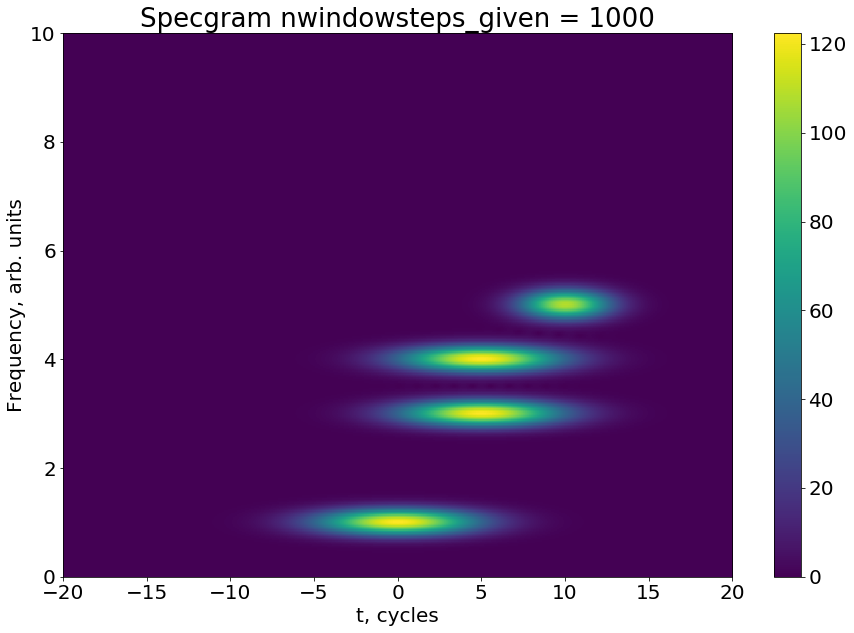

In [10]:
kappa = 1
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

def plot_specfram(window_width_given, nwindowsteps_given, t, w):
    im = my_imshow(t, w, get_specgram(window_width = window_width_given,
                                 nwindowsteps = nwindowsteps_given), 
              title = "Specgram nwindowsteps_given = "+str(nwindowsteps_given), 
              xlabel = "t, cycles", 
              ylabel = "Frequency, arb. units")
    # clim(0,0.5)
    plt.ylim(0, 10)
    im = plt.savefig('Specgram nwindowsteps_given = '+str(nwindowsteps_given)+'.png')
    
plot_specfram(window_width_given, nwindowsteps_given, t, w)

In [11]:
#Image(url='Specgram nwindowsteps_given = '+str(nwindowsteps_given)+'.png')

**Create gif**

In [12]:
%matplotlib agg

In [13]:
name = 'animation.gif'
from tqdm.auto import tqdm

with imageio.get_writer(name, mode='I') as writer:
    for theta in tqdm(np.linspace(np.log(0.001), np.log(10), 100)):
        kappa = np.exp(theta)
        window_width_given = kappa * 2 * pi
        nwindowsteps_given = 1000
        im = my_imshow(t, w, get_specgram(window_width = window_width_given, nwindowsteps = nwindowsteps_given), title = "Specgram, kappa="+str(float("{0:.2f}".format(kappa))), xlabel = "t, cycles", ylabel = "Frequency, arb. units")
        im = plt.savefig('foo.png')
        writer.append_data(imageio.imread('foo.png'))

/Users/jamil/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


In [14]:
Image(url='animation.gif')

**Explanations.** At different values of the Kappa, we capture a different frequency window. That is, it is not a classical Fourier transform in which frequencies on an infinite range will be gathered. We first divide diapason on windows and then used the Fourier transform for each window. So we get different spectograms.

## cProfile the code

* Vary $\operatorname{n\_timestamps\_given} = \overline{4090, \, 5000}$, write down results in this markdown and explain why cProfiler gives different results. What is bottleneck in this program? How can you improve the program?

## cProfile parts of code
### * Wrap the following markdowns as $\mathbf{def}\:\:\: \mathit{plot\_specgram(\dots)}\:\:\: \:\:\: $ and as $\:\:\: \:\:\: \mathbf{def}\:\:\: \mathit{compute\_specgram(\dots)}$: ![Image_1.png](Image_1.png) 
![Image_3.png](Image_3.png)

### * Use, for example, $\mathit{time()}$ for your own profiling, by using, e.g., $\mathit{from\: time\: import\: time}$.
### * Vary $\operatorname{n\_timestamps\_given}$ and (by using, e.g., $\mathit{time()}$) calulate computational time expended on $\mathit{plot\_specgram(\dots)}$ ($=t_{plot}(nwindowsteps\_given)$) and $\mathit{compute\_specgram(\dots)}$ ($=t_{compute}(nwindowsteps\_given)$) and ratios $\frac{t_{plot}(nwindowsteps\_given)}{t_{total}(n\_timestamps\_given)}$ $\frac{t_{compute}(nwindowsteps\_given)}{t_{total}(nwindowsteps\_given)}$, where $t_{total}(nwindowsteps\_given)$ is total computational time of program in for each $n\_timestamps\_given$
### * Plot the graphs of the ratios versus $\mathit{nwindowsteps\_given}$, label axises and title.